## Time series preprocessing

In [1]:
# TSPredIT
# version 1.0.767

source("https://raw.githubusercontent.com/cefet-rj-dal/tspredit/main/jupyter.R")

#loading TSPredIT
load_library("daltoolbox") 
load_library("tspredit") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: tspredit



### Noise cosine series for studying

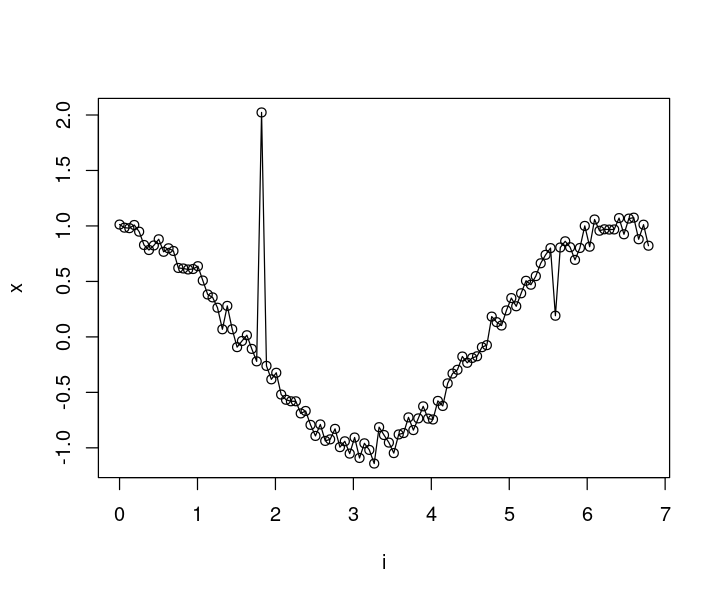

In [2]:
i <- seq(0, 2*pi+8*pi/50, pi/50)
x <- cos(i)
noise <- rnorm(length(x), 0, sd(x)/10)

x <- x + noise
x[30] <-rnorm(1, 0, sd(x))

x[60] <-rnorm(1, 0, sd(x))

x[90] <-rnorm(1, 0, sd(x))


options(repr.plot.width=6, repr.plot.height=5)  
par(mfrow = c(1, 1))
plot(i, x)
lines(i, x)

### sliding windows

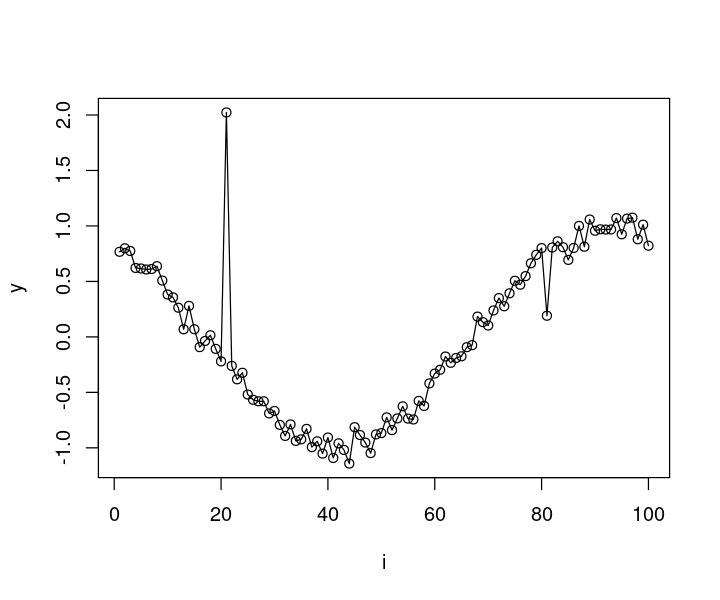

In [3]:
sw_size <- 10
xw <- ts_data(x, sw_size)
i <- 1:nrow(xw)
y <- xw[,sw_size]

plot(i, y)
lines(i, y)

### Augment

In [4]:
filter <- ts_aug_awareness(0.25)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")



### Plot

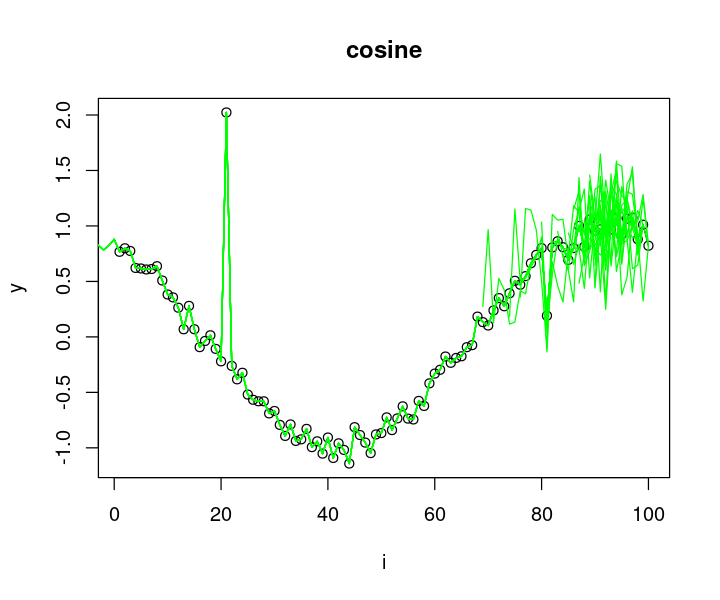

In [5]:
plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}